<a href="https://colab.research.google.com/github/gsf31/python_data/blob/main/decomp_eyd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Digite o caminho para a pasta com os arquivos .dat de decomposição: /content/dat-poster


<ipython-input-13-f0408d93bc56>:58: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legenda.legendHandles:


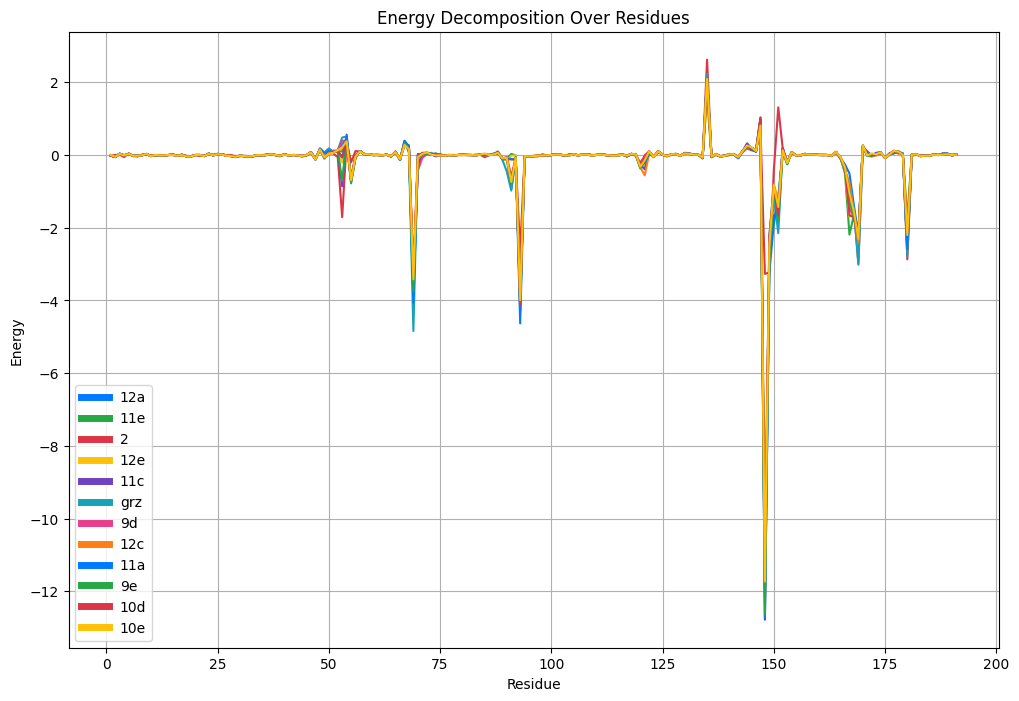

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import os

# Função para ler o arquivo .dat, ignorando a linha de cabeçalho
def read_dat_file(filename):
    # Utiliza genfromtxt para lidar com possíveis linhas de cabeçalho
    data = np.genfromtxt(filename, delimiter=None, skip_header=1)
    return data

# Solicita o caminho da pasta com os arquivos .dat de decomposição
caminho_da_pasta_decomp = input("Digite o caminho para a pasta com os arquivos .dat de decomposição: ")

# Verifica se o caminho da pasta é válido
if not os.path.isdir(caminho_da_pasta_decomp):
    print(f"Erro: O caminho '{caminho_da_pasta_decomp}' não é válido.")
    exit()

# Paleta de cores vibrantes
cores_vibrantes = ['#007bff', '#28a745', '#dc3545', '#ffc107', '#6f42c1',
                   '#17a2b8', '#e83e8c', '#fd7e14']

# Configura o gráfico com fundo branco
plt.style.use('default')
fig, ax = plt.subplots(figsize=(12, 8))

# Listas para armazenar as linhas e os nomes das legendas
linhas = []
nomes_legendas = []

# Conjunto para rastrear os resíduos já adicionados
residuos_adicionados = set()

# Plota os dados de cada arquivo .dat de decomposição
for i, file in enumerate(glob.glob(os.path.join(caminho_da_pasta_decomp, "*.dat"))):
    data = read_dat_file(file)
    residue = data[:, 0]
    average_el = data[:, 2]

    # Extrai a parte desejada do nome do arquivo para a legenda
    nome_legenda = os.path.splitext(os.path.basename(file))[0]
    nome_legenda = nome_legenda.split('-')[-1]

    # Plota as contribuições eletrostáticas ("Average el")
    linha, = plt.plot(residue, average_el,
                    label=nome_legenda,
                    color=cores_vibrantes[i % len(cores_vibrantes)])

    # Armazena a linha e o nome da legenda
    linhas.append(linha)
    nomes_legendas.append(nome_legenda)

#  Configuração da legenda fora do loop
legenda = plt.legend(linhas, nomes_legendas, loc="best")

# Ajusta a largura da linha na legenda
for handle in legenda.legendHandles:
    handle.set_linewidth(5)

# Personalizar o gráfico
plt.title('Energy Decomposition Over Residues')
plt.xlabel('Residue')
plt.ylabel('Energy')
plt.grid(True)

# Salvar o gráfico em alta resolução
plt.savefig("grafico_decomposicao_final.png", dpi=500)
plt.show()